# cadCAD Experiment

In [1]:
import matplotlib.pyplot as plt
from model.run import run

df = run()

print(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 7, 1, 5)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.29s
     allocated_funds  unallocated_funds  \
8         156.278937         156.278937   
16        169.734496         169.734496   
24        173.745342         173.745342   
32        178.664746         178.664746   
40        178.341903         178.341903   
..               ...                ...   
688       233.434668         233.434668   
696       233.047550         233.047550   
704       216.962102         236.462102   
712       222.805559         234.805559   
720       239.653530         239.6

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each broker eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [2]:
import pandas as pd
df1 = df.reset_index().brokers

broker_holdings = {}
broker_claimable = {}
broker_holdings_plus_claimable = {}
timestep = 0
for broker_dict in df1:
    for broker_id, broker in broker_dict.items():
        if broker_id not in broker_holdings:
            broker_holdings[broker_id] = {}
            broker_claimable[broker_id] = {}
            broker_holdings_plus_claimable[broker_id] = {}
        broker_holdings[broker_id][timestep] = broker.holdings
        broker_claimable[broker_id][timestep] = broker.claimable_funds
        broker_holdings_plus_claimable[broker_id][timestep] = broker.holdings + broker.claimable_funds
        
    timestep += 1

Text(0, 0.5, 'Broker Holdings')

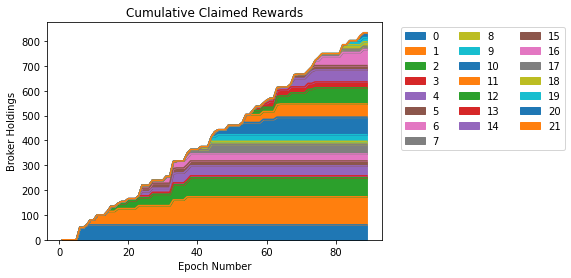

In [3]:


df_plot = pd.DataFrame(broker_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Claimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Holdings')

# Cumulative Unclaimed Rewards

This shows that the rewards are all claimed eventually, and the unclaimed rewards do not grow unbounded which would represent a leak in the system.


Text(0, 0.5, 'Broker Claimable Funds')

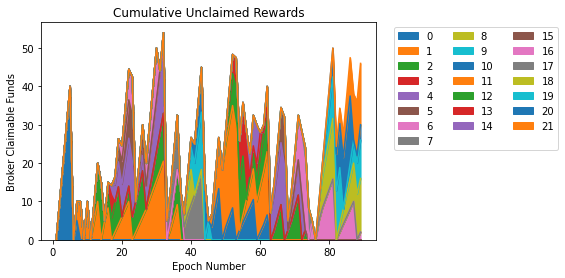

In [4]:
df_plot = pd.DataFrame(broker_claimable)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Unclaimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Claimable Funds')

# Plot to show Claimed Rewards + Unclaimed Rewards
This shows a straight line is monotonically increasing rewards, as a sanity check that the amount of rewards per epoch is a constant.

Text(0, 0.5, 'Broker Claimable Funds')

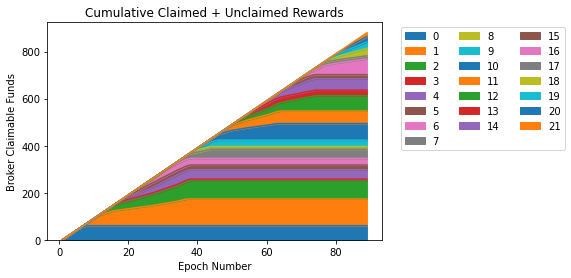

In [14]:
df_plot = pd.DataFrame(broker_holdings_plus_claimable)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Claimed + Unclaimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Claimable Funds')


# Twinned x axis, Number of Member Brokers vs Total Broker Stake.  

This plot shows that each broker has exactly $5 staked on average.




Text(0, 0.5, 'Total Broker Stake')

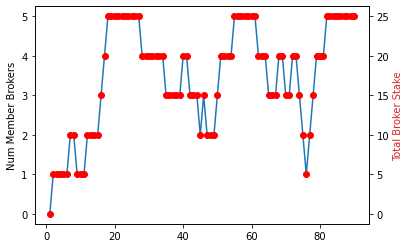

In [26]:
fig, ax1 = plt.subplots()

ax1.plot(df.timestep, df.num_member_brokers, label='test1')
ax1.set_ylabel('Num Member Brokers')
ax2 = ax1.twinx()
ax2.plot(df.timestep, df.total_broker_stake, 'ro', label='test2')
ax2.set_ylabel('Total Broker Stake', color = 'tab:red')


In [6]:
df['members'] = df.brokers.apply(lambda x: [v.id for v in x.values() if v.member])

In [7]:
df.members

8                        []
16                      [0]
24                      [0]
32                      [0]
40                      [0]
               ...         
688    [16, 18, 19, 20, 21]
696    [16, 18, 19, 20, 21]
704    [16, 18, 19, 20, 21]
712    [16, 18, 19, 20, 21]
720    [16, 18, 19, 20, 21]
Name: members, Length: 90, dtype: object

In [8]:
broker_ids = [v.id for v in df.brokers.values[-1].values()]

In [9]:
df['broker_stakes'] = df.brokers.apply(lambda x: [(v.member, v.stake) for v in x.values()])

In [10]:
def check(x):
    if x[0]:
        if x[1]==5:
            #return "member with correct stake"
            return True
        else:
            #return "member with incorrect stake"
            return False
    else:
        if x[1]==0:
            #return "nonmember with correct stake"
            return True
        else:
            #return "nonmember with incorrect stake"
            return False

In [11]:
df.broker_stakes.apply(lambda z: [check(x) for x in z])  

8                                                     []
16                                                [True]
24                                                [True]
32                                                [True]
40                                                [True]
                             ...                        
688    [True, True, True, True, True, True, True, Tru...
696    [True, True, True, True, True, True, True, Tru...
704    [True, True, True, True, True, True, True, Tru...
712    [True, True, True, True, True, True, True, Tru...
720    [True, True, True, True, True, True, True, Tru...
Name: broker_stakes, Length: 90, dtype: object

In [12]:
df['broker_based_total_stake'] = df.broker_stakes.apply(lambda z: sum([x[1] for x in z if x[0]]))

In [13]:
df['broker_based_total_stake']

8       0
16      5
24      5
32      5
40      5
       ..
688    25
696    25
704    25
712    25
720    25
Name: broker_based_total_stake, Length: 90, dtype: int64